In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('yield_df.csv')

In [47]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [48]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [49]:
df.shape

(28242, 7)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [51]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [52]:
df.duplicated().sum()

np.int64(2310)

In [53]:
df.drop_duplicates(inplace=True)

In [54]:
df.duplicated().sum()

np.int64(0)

# Transforming average_rain_fall_mm_per_year
In summary, this code identifies the indices of rows in the DataFrame df where the values in the column 'average_rain_fall_mm_per_year' are not numeric strings. These rows can be considered for removal or further processing, depending on the specific use case.

In [55]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [56]:
df = df.drop(to_drop)

In [57]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [58]:
df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].astype(np.float64)

# Graph Frequency vs Area

In [59]:
len(df['Area'].unique())

101

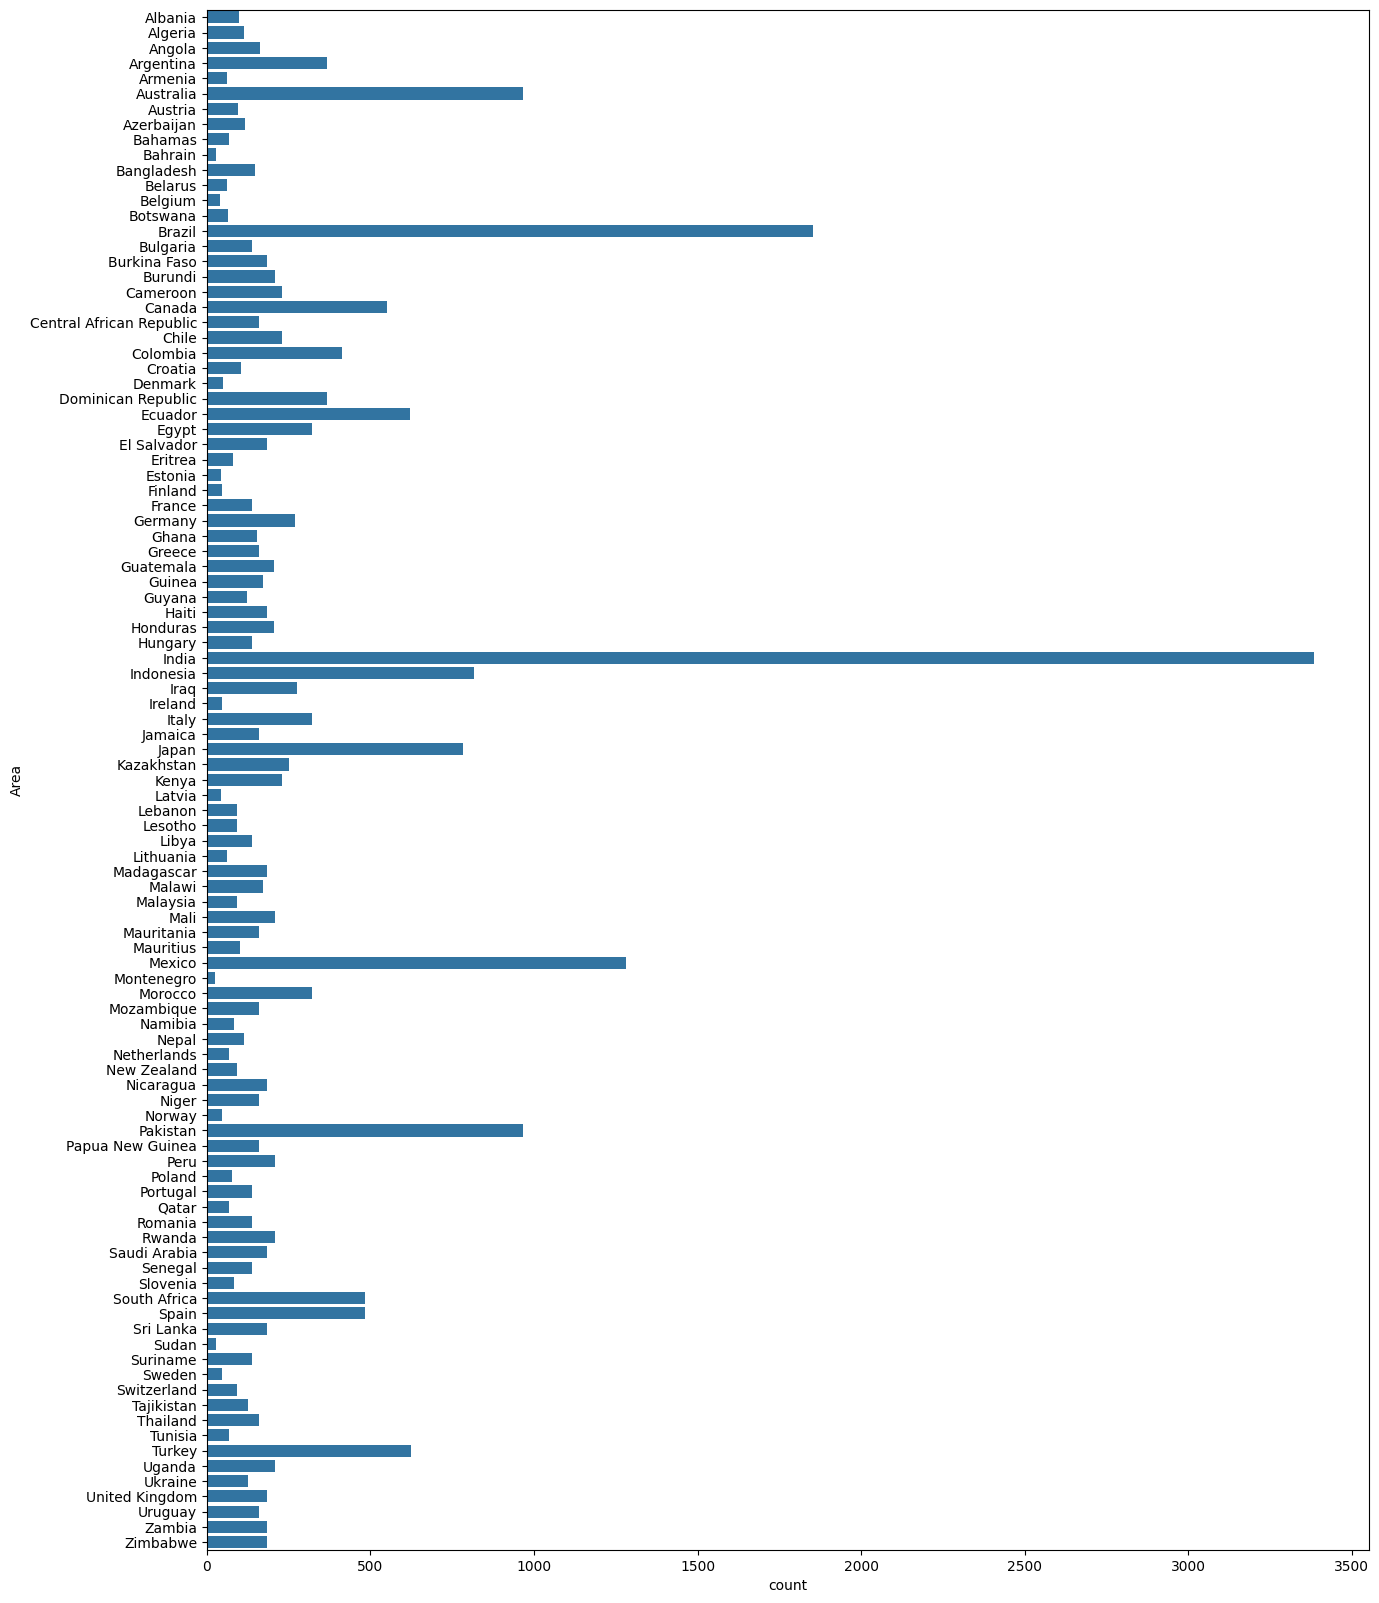

In [60]:
plt.figure(figsize=(15,20))
sns.countplot(y=df['Area'])
plt.show()

In [61]:
(df['Area'].value_counts() < 500).sum()

np.int64(91)

# yield_per_country

In [62]:
country = df['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area']==state]['hg/ha_yield'].sum())

yield_per_country = df.groupby('Area')['hg/ha_yield'].sum()

In [63]:
df['hg/ha_yield'].sum()

np.int64(1996196943)

In [64]:
yield_per_country

Area
Albania            5711536
Algeria            6711464
Angola             5722563
Argentina         32864032
Armenia            4524100
                    ...   
Ukraine            5496901
United Kingdom    44335992
Uruguay            9539820
Zambia             7254311
Zimbabwe           7408629
Name: hg/ha_yield, Length: 101, dtype: int64

# Yield Per Country Graph

<Axes: xlabel='hg/ha_yield'>

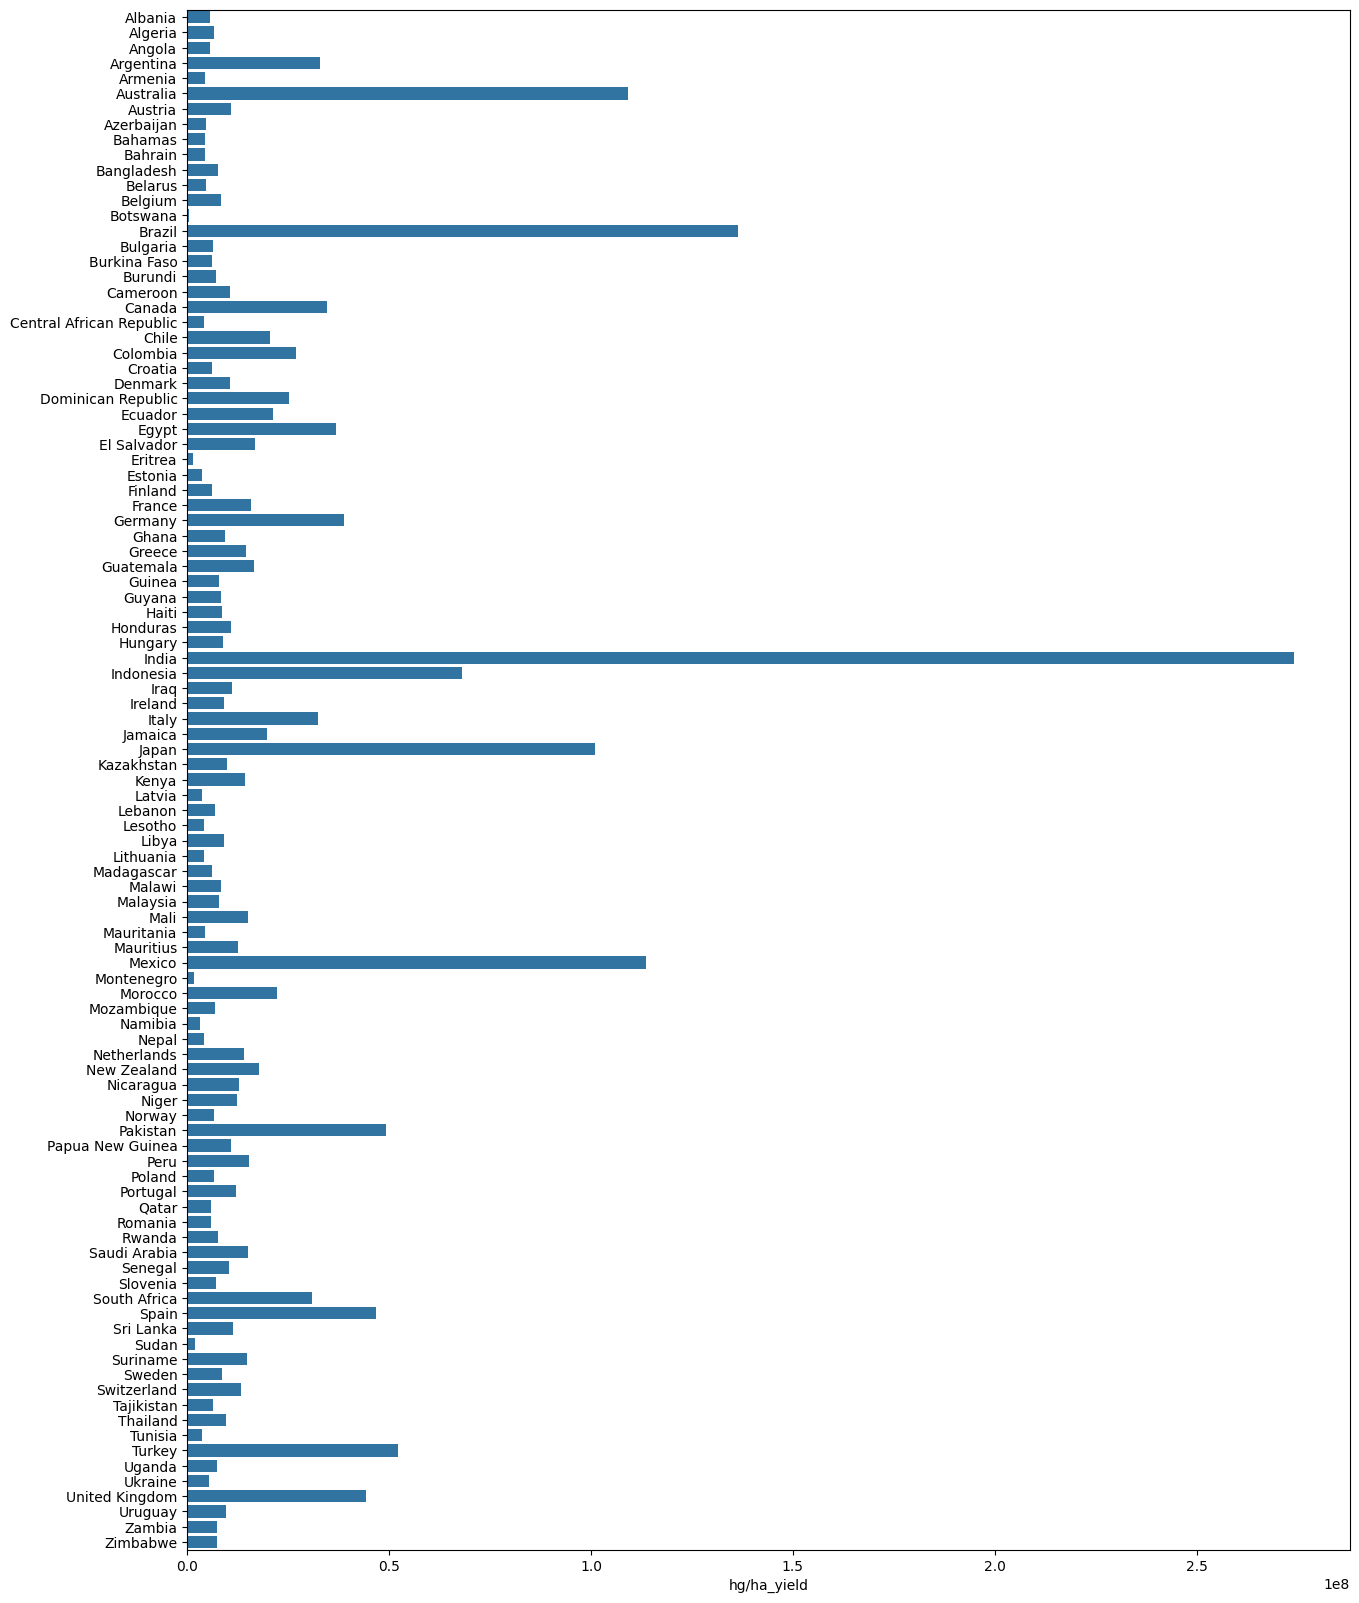

In [65]:
plt.figure(figsize=(15, 20))
sns.barplot(y=country, x=yield_per_country)

# Graph Frequency vs Item

<Axes: xlabel='count', ylabel='Item'>

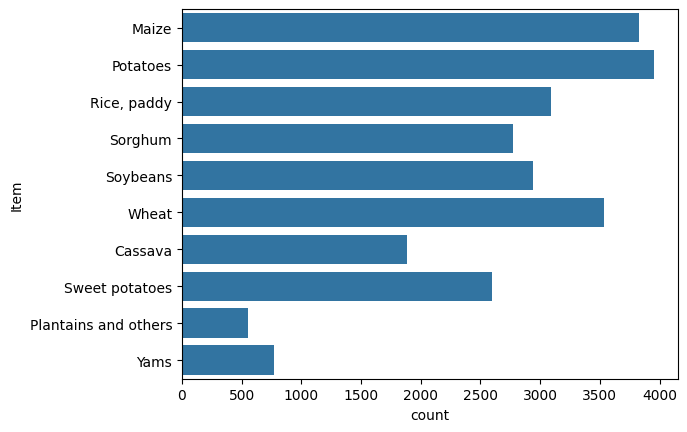

In [66]:
sns.countplot(y=df['Item'])

# Yield Vs Item

In [67]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())

<Axes: >

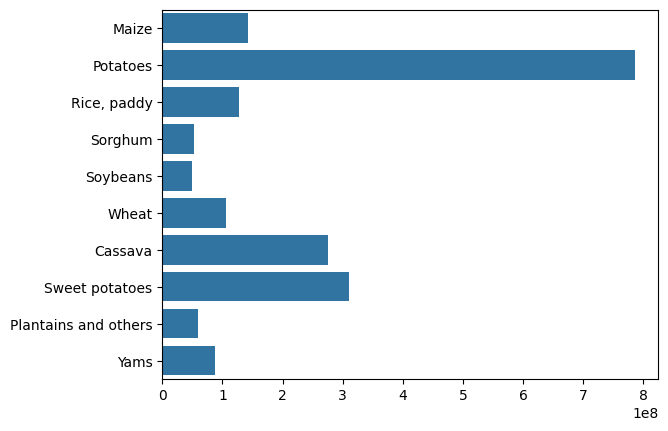

In [68]:
sns.barplot(y=crops,x=yield_per_crop)

# Train Test split Rearranging Columns

In [69]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [70]:
df.head(3)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

# Converting Categorical to Numerical and Scaling the values

In [72]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [0, 1, 2, 3]),
            ('OHE', ohe, [4, 5]),
        ],
        remainder='passthrough'
)

In [73]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [74]:
preprocesser.get_feature_names_out(col[:-1])

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OHE__Area_Algeria', 'OHE__Area_Angola', 'OHE__Area_Argentina',
       'OHE__Area_Armenia', 'OHE__Area_Australia', 'OHE__Area_Austria',
       'OHE__Area_Azerbaijan', 'OHE__Area_Bahamas', 'OHE__Area_Bahrain',
       'OHE__Area_Bangladesh', 'OHE__Area_Belarus', 'OHE__Area_Belgium',
       'OHE__Area_Botswana', 'OHE__Area_Brazil', 'OHE__Area_Bulgaria',
       'OHE__Area_Burkina Faso', 'OHE__Area_Burundi',
       'OHE__Area_Cameroon', 'OHE__Area_Canada',
       'OHE__Area_Central African Republic', 'OHE__Area_Chile',
       'OHE__Area_Colombia', 'OHE__Area_Croatia', 'OHE__Area_Denmark',
       'OHE__Area_Dominican Republic', 'OHE__Area_Ecuador',
       'OHE__Area_Egypt', 'OHE__Area_El Salvador', 'OHE__Area_Eritrea',
       'OHE__Area_Estonia', 'OHE__Area_Finland', 'OHE__Area_France',
       'OHE__Area_Germany', 'OHE__Area_Ghana',

# Let's train our model

In [75]:
#linear regression
# from sklearn.linear_model import LinearRegression,Lasso,Ridge
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import mean_absolute_error,r2_score


# models = {
#     'lr':LinearRegression(),
#     'lss':Lasso(),
#     'Rid':Ridge(),
#     'Dtr':DecisionTreeRegressor()
# }
# for name, md in models.items():
#     md.fit(X_train_dummy,y_train)
#     y_pred = md.predict(X_test_dummy)
    
#     print(f"{name} : mae : {mean_absolute_error(y_test,y_pred)} score : {r2_score(y_test,y_pred)}")

# Select model

In [76]:
# dtr = DecisionTreeRegressor()
# dtr.fit(X_train_dummy,y_train)
# dtr.predict(X_test_dummy)

# Predictive System

In [77]:
# def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
#     # Create an array of the input features
#     features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], dtype=object)

#     # Transform the features using the preprocessor
#     transformed_features = preprocesser.transform(features)

#     # Make the prediction
#     predicted_yield = dtr.predict(transformed_features).reshape(1, -1)

#     return predicted_yield[0]

# Year = 1990
# average_rain_fall_mm_per_year =1485.0
# pesticides_tonnes = 121.00
# avg_temp = 16.37                   
# Area = 'Albania'
# Item = 'Maize'
# result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)


In [78]:
#result

In [79]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Dictionary of models
models = {
    'lr': LinearRegression(),
    'lss': Lasso(),
    'Rid': Ridge(),
    'Dtr': DecisionTreeRegressor(),
    'Rfr': RandomForestRegressor(n_estimators=100, random_state=42)  # Random Forest
}

best_model = None
best_score = float('-inf')  # very small number
best_name = None

# Train, predict, evaluate
for name, md in models.items():
    md.fit(X_train_dummy, y_train)
    y_pred = md.predict(X_test_dummy)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} : mae = {mae:.3f}  |  r2 score = {r2:.3f}")

    # Keep track of best model (by R² score)
    if r2 > best_score:
        best_score = r2
        best_model = md
        best_name = name

print("\nBest model is:", best_name, "with R² =", best_score)


lr : mae = 29907.431  |  r2 score = 0.747


C:\Users\allam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.728e+10, tolerance: 1.485e+10
  model = cd_fast.sparse_enet_coordinate_descent(


lss : mae = 29893.998  |  r2 score = 0.747
Rid : mae = 29864.924  |  r2 score = 0.747
Dtr : mae = 3899.288  |  r2 score = 0.980
Rfr : mae = 3686.689  |  r2 score = 0.988

Best model is: Rfr with R² = 0.9880507571350641


In [80]:
def prediction(model, Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    """
    Predict crop yield using the given trained model.
    """
    # Create an array of the input features
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], dtype=object)

    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features)

    # Make the prediction
    predicted_yield = model.predict(transformed_features)

    return predicted_yield[0]   # return the number directly


In [81]:
# Example input values
Year = 1990
average_rain_fall_mm_per_year = 1485.0
pesticides_tonnes = 121.00
avg_temp = 16.37                   
Area = 'Albania'
Item = 'Maize'

# Use the best trained model (e.g., RandomForest, DecisionTree, etc.)
result = prediction(best_model, Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)

print("Predicted Yield (hg/ha):", result)

# Optional: Convert hg/ha → tons/ha
tons_per_ha = (result * 0.1) / 1000   # since 1 hg = 0.1 kg
print("Predicted Yield (tons/ha):", tons_per_ha)


C:\Users\allam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\allam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


Predicted Yield (hg/ha): 32969.72
Predicted Yield (tons/ha): 3.2969720000000002


In [82]:
print(best_model)

RandomForestRegressor(random_state=42)


# Pickle Files

In [83]:
import pickle

# Save best model
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

# Save preprocessor
with open("preprocessor.pkl", "wb") as f:
    pickle.dump(preprocesser, f)


In [84]:
import sklearn
print(sklearn.__version__)

1.7.1
